In [2]:
import pandas as pd


uber_data = pd.read_csv(r"C:\Users\Bhanu\Downloads\Uber_Drives_2016.csv")


print( uber_data.shape)

print(uber_data['CATEGORY*'].unique())
print(uber_data['PURPOSE*'].isnull().sum())

(1156, 7)
['Business' 'Personal' nan]
503


In [3]:
uber_data.columns = uber_data.columns.str.upper()
print(uber_data.columns)

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')


In [4]:
print(uber_data.head())

      START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit  


In [7]:
import pandas as pd

uber_data = pd.read_csv(r"C:\Users\Bhanu\Downloads\Uber_Drives_2016.csv")
uber_data.columns = uber_data.columns.str.upper()

# Remove rows with 'Totals' or invalid data
uber_data = uber_data[uber_data['START_DATE*'] != 'Totals']

# Replace missing PURPOSE values
uber_data['PURPOSE*'] = uber_data['PURPOSE*'].fillna('Not Specified')

# Convert to datetime safely
uber_data['START_DATE*'] = pd.to_datetime(uber_data['START_DATE*'], errors='coerce')
uber_data['END_DATE*'] = pd.to_datetime(uber_data['END_DATE*'], errors='coerce')

# Drop any rows that failed conversion (NaT)
uber_data = uber_data.dropna(subset=['START_DATE*', 'END_DATE*'])

# Create trip duration
uber_data['TRIP_DURATION'] = uber_data['END_DATE*'] - uber_data['START_DATE*']

# Display top 5 longest trips
top5_longest = uber_data.nlargest(5, 'MILES*')
print(top5_longest)

# Sort by distance
sorted_df = uber_data.sort_values(by='MILES*', ascending=False)
print(sorted_df.head())


            START_DATE*           END_DATE* CATEGORY*            START*  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business             Latta   
270 2016-03-25 22:54:00 2016-03-26 01:39:00  Business      Jacksonville   
881 2016-10-30 15:22:00 2016-10-30 18:23:00  Business         Asheville   
776 2016-09-27 21:01:00 2016-09-28 02:37:00  Business  Unknown Location   
546 2016-07-14 16:39:00 2016-07-14 20:05:00  Business       Morrisville   

                STOP*  MILES*        PURPOSE*   TRIP_DURATION  
269      Jacksonville   310.3  Customer Visit 0 days 05:30:00  
270         Kissimmee   201.0         Meeting 0 days 02:45:00  
881            Mebane   195.9   Not Specified 0 days 03:01:00  
776  Unknown Location   195.6   Not Specified 0 days 05:36:00  
546        Banner Elk   195.3   Not Specified 0 days 03:26:00  
            START_DATE*           END_DATE* CATEGORY*            START*  \
269 2016-03-25 16:52:00 2016-03-25 22:22:00  Business             Latta   
270 2016-03-25 

Matplotlib is building the font cache; this may take a moment.


CATEGORY*
Business    10.655844
Personal     9.320779
Name: MILES*, dtype: float64
PURPOSE*
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64
START*
Cary                201
Unknown Location    148
Morrisville          85
Name: count, dtype: int64


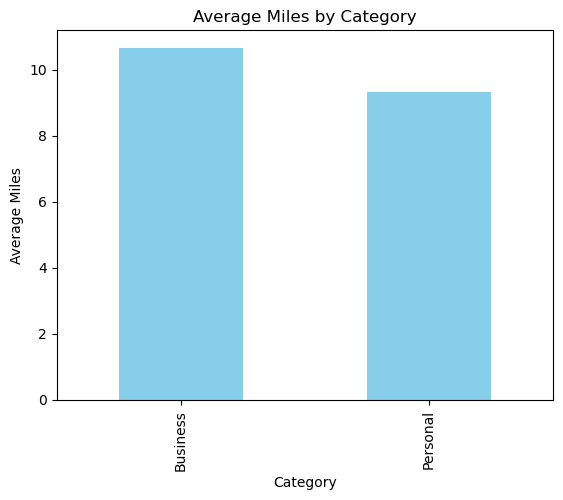

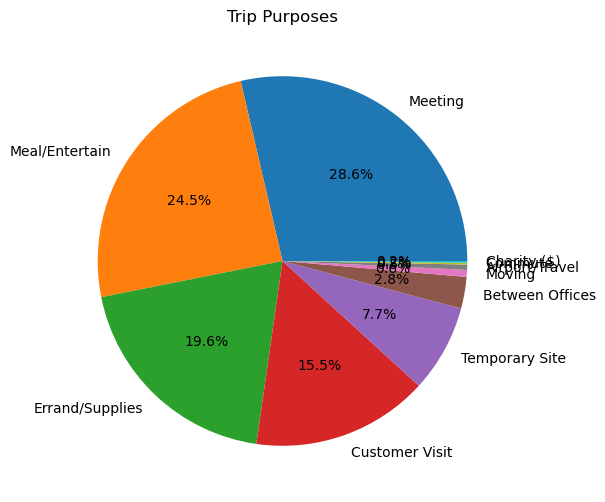

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

uber_data = pd.read_csv(r"C:\Users\Bhanu\Downloads\Uber_Drives_2016.csv")
uber_data.columns = uber_data.columns.str.upper()

avg_miles = uber_data.groupby('CATEGORY*')['MILES*'].mean()
print(avg_miles)

purpose_counts = uber_data['PURPOSE*'].value_counts()
print(purpose_counts)

top3_locations = uber_data['START*'].value_counts().head(3)
print(top3_locations)

avg_miles.plot(kind='bar', color='skyblue', title='Average Miles by Category')
plt.xlabel('Category')
plt.ylabel('Average Miles')
plt.show()

purpose_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Trip Purposes')
plt.ylabel('')
plt.show()
